# Email Spam/Ham Classifier

In [69]:
import os
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get the Data

In [9]:
def read_files(dire):
    target_dir = os.path.join(dire)
    #list the files
    filelist = os.listdir(target_dir) 
    return [open(os.path.join(dire+file), encoding='utf-8', errors='ignore').read() for file in filelist]


ham_messages = read_files('ham_2/')
spam_messages = read_files('spam_2/')

In [10]:
ham_messages[0].replace('\n', ' ')

'Return-Path: <exmh-workers-admin@spamassassin.taint.org> Delivered-To: yyyy@localhost.netnoteinc.com Received: from localhost (localhost [127.0.0.1]) \tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7106643C34 \tfor <jm@localhost>; Wed, 21 Aug 2002 08:33:03 -0400 (EDT) Received: from phobos [127.0.0.1] \tby localhost with IMAP (fetchmail-5.9.0) \tfor jm@localhost (single-drop); Wed, 21 Aug 2002 13:33:03 +0100 (IST) Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by     dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LCXvZ24654 for     <jm-exmh@jmason.org>; Wed, 21 Aug 2002 13:33:57 +0100 Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by     listman.redhat.com (Postfix) with ESMTP id F12A13EA25; Wed, 21 Aug 2002     08:34:00 -0400 (EDT) Delivered-To: exmh-workers@listman.spamassassin.taint.org Received: from int-mx1.corp.spamassassin.taint.org (int-mx1.corp.spamassassin.taint.org     [172.16.5

In [11]:
spam_messages[0]

'From ilug-admin@linux.ie  Tue Aug  6 11:51:02 2002\nReturn-Path: <ilug-admin@linux.ie>\nDelivered-To: yyyy@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 9E1F5441DD\n\tfor <jm@localhost>; Tue,  6 Aug 2002 06:48:09 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Tue, 06 Aug 2002 11:48:09 +0100 (IST)\nReceived: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g72LqWv13294 for\n    <jm-ilug@jmason.org>; Fri, 2 Aug 2002 22:52:32 +0100\nReceived: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org\n    (8.9.3/8.9.3) with ESMTP id WAA31224; Fri, 2 Aug 2002 22:50:17 +0100\nReceived: from bettyjagessar.com (w142.z064000057.nyc-ny.dsl.cnc.net\n    [64.0.57.142]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id WAA31201 for\n    <ilug@linux.ie>; Fri, 2 Aug 2002 

In [50]:
hams = np.ones(len(ham_messages))
spams = np.zeros(len(ham_messages))
len(ham_messages)

1401

In [51]:
hams = np.concatenate((hams, np.zeros(len(spam_messages))))
spams = np.concatenate((spams, np.ones(len(spam_messages))))
len(spam_messages)

2798

In [52]:
data = {}
data['message'] = ham_messages + spam_messages
data['ham'] = hams
data['spam'] = spams

In [53]:
len(data['message'])

2798

In [106]:
df = pd.DataFrame(data)
df['label'] = df['ham'].apply(lambda x: 'ham' if x == 1 else 'spam')

# Exploring the data

In [107]:
df.head()

,ham,message,spam,label
0,1.0,Return-Path: <exmh-workers-admin@spamassassin....,0.0,ham
1,1.0,From exmh-workers-admin@redhat.com Wed Aug 21...,0.0,ham
2,1.0,From exmh-workers-admin@redhat.com Wed Aug 21...,0.0,ham
3,1.0,From exmh-workers-admin@redhat.com Wed Aug 21...,0.0,ham
4,1.0,From exmh-workers-admin@redhat.com Wed Aug 21...,0.0,ham


In [66]:
df.groupby('ham').describe()

spam                                   
      count mean  std  min  25%  50%  75%  max
ham                                           
0.0  1397.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
1.0  1401.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [67]:
df.groupby('spam').describe()

ham                                   
       count mean  std  min  25%  50%  75%  max
spam                                           
0.0   1401.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
1.0   1397.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 4 columns):
ham        2798 non-null float64
message    2798 non-null object
spam       2798 non-null float64
label      2798 non-null object
dtypes: float64(2), object(2)
memory usage: 87.5+ KB


In [111]:
df['length'] = df['message'].apply(len)

print("Message Length mean: ", df['length'].mean())
print("Message Length max: ", df['length'].max())
print("Message Length min: ", df['length'].min())

Message Length mean:  5312.39456755
Message Length max:  113400
Message Length min:  761


# Data visualization

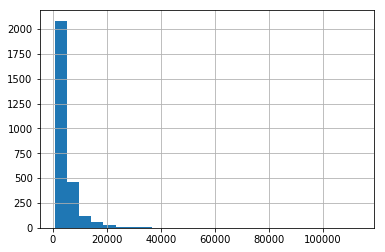

In [112]:
df['length'].hist(bins = 25)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x112271588>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1128c65c0>], dtype=object)

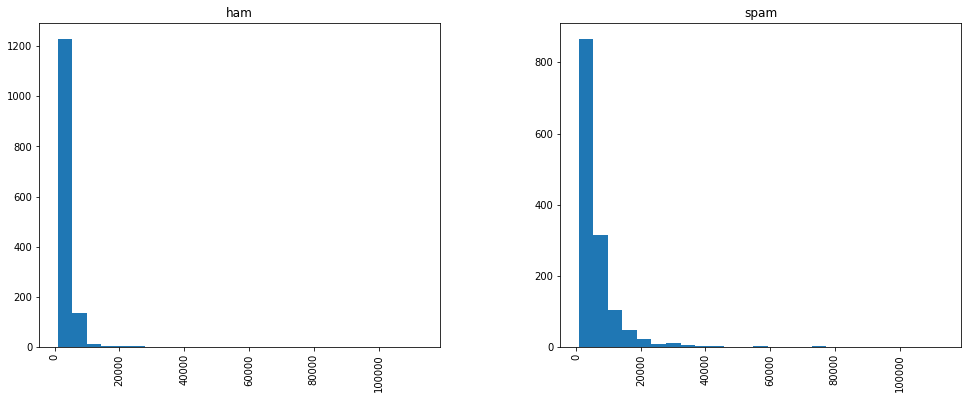

In [113]:
df.hist(column='length', by='label', bins = 25, figsize=(16,6)) 

# Text preprocessing

In [63]:
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [64]:
from sklearn.feature_extraction.text import CountVectorizer

# Might take awhile...
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['message'])

# Print total number of vocab words
print(len(bow_transformer.vocabulary_))

143098


In [93]:
message4 = df['message'][3]
print(message4)

From exmh-workers-admin@redhat.com  Wed Aug 21 16:18:52 2002
Return-Path: <exmh-workers-admin@spamassassin.taint.org>
Delivered-To: yyyy@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7725443C36
	for <jm@localhost>; Wed, 21 Aug 2002 11:18:37 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Wed, 21 Aug 2002 16:18:37 +0100 (IST)
Received: from listman.spamassassin.taint.org (listman.spamassassin.taint.org [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7LFK4Z30918 for
    <jm-exmh@jmason.org>; Wed, 21 Aug 2002 16:20:04 +0100
Received: from listman.spamassassin.taint.org (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id E0F013F29A; Wed, 21 Aug 2002
    11:20:12 -0400 (EDT)
Delivered-To: exmh-workers@listman.spamassassin.taint.org
Received: from int-mx1.corp.spamassassin.tain

In [94]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 2)	3
  (0, 5)	4
  (0, 3219)	2
  (0, 5728)	6
  (0, 5862)	1
  (0, 6185)	3
  (0, 7264)	1
  (0, 7699)	1
  (0, 7813)	1
  (0, 9893)	6
  (0, 9894)	1
  (0, 10185)	1
  (0, 10229)	1
  (0, 10349)	1
  (0, 10350)	1
  (0, 10768)	2
  (0, 10773)	1
  (0, 10994)	1
  (0, 11794)	1
  (0, 12197)	2
  (0, 12199)	1
  (0, 12220)	1
  (0, 12256)	1
  (0, 13228)	1
  (0, 14365)	4
  :	:
  (0, 137583)	3
  (0, 137598)	2
  (0, 137603)	3
  (0, 137691)	1
  (0, 137808)	1
  (0, 137831)	1
  (0, 137874)	1
  (0, 138804)	2
  (0, 138948)	1
  (0, 138996)	1
  (0, 139217)	1
  (0, 139409)	1
  (0, 139507)	2
  (0, 139912)	1
  (0, 139977)	1
  (0, 140048)	1
  (0, 140159)	1
  (0, 140163)	1
  (0, 140172)	1
  (0, 140176)	1
  (0, 141526)	8
  (0, 141626)	25
  (0, 141821)	5
  (0, 141866)	1
  (0, 142741)	1
(1, 143098)


In [95]:
print(bow_transformer.get_feature_names()[4073])
print(bow_transformer.get_feature_names()[9570])

012931073233e92a1fb8808e384cbc0d60e58
09ba


In [96]:
messages_bow = bow_transformer.transform(df['message'])

In [97]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (2798, 143098)
Amount of Non-Zero occurences:  655237


In [98]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


# TF-IDF

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 142741)	0.0048374462886
  (0, 141866)	0.0182619904687
  (0, 141821)	0.0420957473738
  (0, 141626)	0.288108577161
  (0, 141526)	0.144651896134
  (0, 140176)	0.0197461834754
  (0, 140172)	0.0244994732035
  (0, 140163)	0.0239709253975
  (0, 140159)	0.0186542776786
  (0, 140048)	0.0172295692277
  (0, 139977)	0.0105968951972
  (0, 139912)	0.0130537489529
  (0, 139507)	0.0190642461443
  (0, 139409)	0.0192176356694
  (0, 139217)	0.0167206706088
  (0, 138996)	0.0203713228451
  (0, 138948)	0.0192176356694
  (0, 138804)	0.022240983409
  (0, 137874)	0.0221228283395
  (0, 137831)	0.0187597867344
  (0, 137808)	0.0190973154729
  (0, 137691)	0.00943896361365
  (0, 137603)	0.0476560368139
  (0, 137598)	0.0223339685288
  (0, 137583)	0.0263184921911
  :	:
  (0, 14365)	0.0175516829855
  (0, 13228)	0.0113348598639
  (0, 12256)	0.0268761180676
  (0, 12220)	0.0282663661906
  (0, 12199)	0.0268761180676
  (0, 12197)	0.0565327323811
  (0, 11794)	0.0251246125732
  (0, 10994)	0.0186542776786
  (0, 10773)	0

In [100]:
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['012931073233e92a1fb8808e384cbc0d60e58']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['workers']])

8.24387030896
6.45211083973


In [101]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(2798, 143098)


# Train-Test Split

In [114]:
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(df['message'], 
                                                                df['label'], 
                                                                test_size=0.2)

print(len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

2238 560 2798


# Create a Pipeline

In [115]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

# Train and evaluate the model using the Pipeline

In [116]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x10dc4f0d0>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [117]:
predictions = pipeline.predict(msg_test)

In [118]:
from sklearn.metrics import classification_report

print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.91      0.95       325
       spam       0.89      1.00      0.94       235

avg / total       0.95      0.95      0.95       560

